<a href="https://colab.research.google.com/github/DariyaB01/DariyaB01/blob/main/NLP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from transformers import pipeline


In [ ]:
dataset = load_dataset("imdb")

README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
train_df = pd.DataFrame(dataset["train"])
train_df.head()


,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


In [ ]:
sample_df = train_df.sample(300, random_state=42).reset_index(drop=True)

In [ ]:
sample_df["short_text"] = sample_df["text"].apply(lambda x: x[:500])
sample_texts = sample_df["short_text"].tolist()


In [ ]:
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

Device set to use cpu


In [ ]:
results = sentiment_analyzer(sample_texts)

In [ ]:
results[0]

{'label': 'NEGATIVE', 'score': 0.9996199607849121}

In [ ]:
sample_df["pred_label"] = [r["label"] for r in results]
sample_df["pred_score"] = [r["score"] for r in results]
sample_df.head()

,text,label,short_text,pred_label,pred_score
0,"Dumb is as dumb does, in this thoroughly unint...",0,"Dumb is as dumb does, in this thoroughly unint...",NEGATIVE,0.999620
1,I dug out from my garage some old musicals and...,1,I dug out from my garage some old musicals and...,POSITIVE,0.998523
2,After watching this movie I was honestly disap...,0,After watching this movie I was honestly disap...,NEGATIVE,0.995243
3,This movie was nominated for best picture but ...,1,This movie was nominated for best picture but ...,NEGATIVE,0.996643
4,Just like Al Gore shook us up with his painful...,1,Just like Al Gore shook us up with his painful...,POSITIVE,0.987664


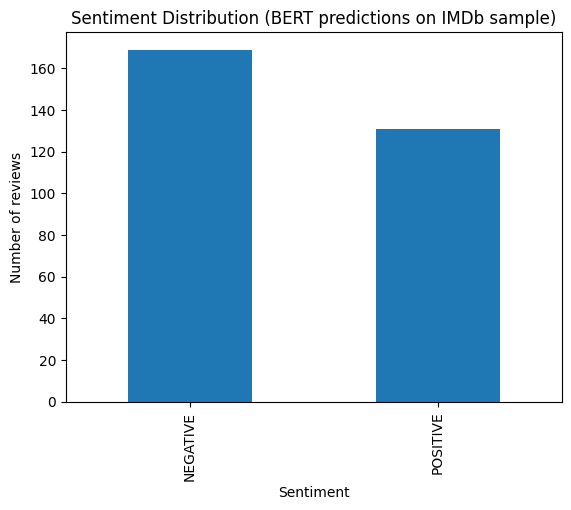

In [ ]:
sample_df["pred_label"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution (BERT predictions on IMDb sample)")
plt.xlabel("Sentiment")
plt.ylabel("Number of reviews")
plt.show()

In [ ]:
!pip install scikit-learn -q
from sklearn.metrics import accuracy_score

true_labels = sample_df["label"].map({0: "NEGATIVE", 1: "POSITIVE"})
pred_labels = sample_df["pred_label"]

accuracy = accuracy_score(true_labels, pred_labels)
accuracy


0.8266666666666667